# **TP 5 - TEXTE**

---

Sandeep-Singh NIRMAL - Manel LOUNISSI

**00 - Installation des librairies nécessaires**

In [ ]:
!pip install gensim
!pip install scikit-learn
!pip install sentence-transformers
!pip install matplotlib
!pip install nltk


**Étape 1 – Créer une petite collection de 5–6 documents texte**

In [ ]:
documents = [
    "Les joueurs attendent avec impatience la sortie du nouveau jeu d’action.",
    "Ce RPG propose une histoire captivante et des personnages inoubliables.",
    "Les graphismes réalistes rendent l’expérience encore plus immersive.",
    "Le mode multijoueur permet de jouer avec des amis partout dans le monde.",
    "La bande sonore du jeu crée une ambiance unique et mémorable.",
    "Les développeurs corrigent régulièrement les bugs avec des mises à jour."
]



**Étape 2 – Faire un préprocessing (lowercase, nettoyage, stopwords).**

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]
print(processed_docs)


[['les', 'joueurs', 'attendent', 'avec', 'impatience', 'la', 'sortie', 'du', 'nouveau', 'jeu', 'daction'], ['ce', 'rpg', 'propose', 'une', 'histoire', 'captivante', 'et', 'des', 'personnages', 'inoubliables'], ['les', 'graphismes', 'ralistes', 'rendent', 'lexprience', 'encore', 'plus', 'immersive'], ['le', 'mode', 'multijoueur', 'permet', 'de', 'jouer', 'avec', 'des', 'amis', 'partout', 'dans', 'le', 'monde'], ['la', 'bande', 'sonore', 'du', 'jeu', 'cre', 'une', 'ambiance', 'unique', 'et', 'mmorable'], ['les', 'dveloppeurs', 'corrigent', 'rgulirement', 'les', 'bugs', 'avec', 'des', 'mises', 'jour']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Étape 3 – Construire la matrice Bag of Words**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(documents)

# Transformation en DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words – Tableau structuré :")
display(bow_df)



Bag of Words – Tableau structuré :


,action,ambiance,amis,attendent,avec,bande,bugs,captivante,ce,corrigent,...,plus,propose,rendent,rpg,réalistes,régulièrement,sonore,sortie,une,unique
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
5,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


**Étape 4 – Construire la matrice TF-IDF**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(documents)

# Transformation en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("TF-IDF – Tableau structuré :")
display(tfidf_df)


TF-IDF – Tableau structuré :


,action,ambiance,amis,attendent,avec,bande,bugs,captivante,ce,corrigent,...,plus,propose,rendent,rpg,réalistes,régulièrement,sonore,sortie,une,unique
0,0.333781,0.000000,0.000000,0.333781,0.231081,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333781,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336638,0.336638,0.000000,...,0.000000,0.336638,0.000000,0.336638,0.000000,0.000000,0.000000,0.000000,0.276048,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.365653,0.000000,0.365653,0.000000,0.365653,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.277793,0.000000,0.192319,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.326823,0.000000,0.000000,0.000000,0.326823,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326823,0.000000,0.268000,0.326823
5,0.000000,0.000000,0.000000,0.000000,0.232380,0.000000,0.335658,0.000000,0.000000,0.335658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.335658,0.000000,0.000000,0.000000,0.000000


**Étape 5 – Afficher le vocabulaire extrait**

In [ ]:
print("Vocabulaire extrait:")
print(vectorizer.get_feature_names_out())


Vocabulaire extrait:
['action' 'ambiance' 'amis' 'attendent' 'avec' 'bande' 'bugs' 'captivante'
 'ce' 'corrigent' 'crée' 'dans' 'des' 'du' 'développeurs' 'encore' 'et'
 'expérience' 'graphismes' 'histoire' 'immersive' 'impatience'
 'inoubliables' 'jeu' 'jouer' 'joueurs' 'jour' 'la' 'le' 'les' 'mises'
 'mode' 'monde' 'multijoueur' 'mémorable' 'nouveau' 'partout' 'permet'
 'personnages' 'plus' 'propose' 'rendent' 'rpg' 'réalistes'
 'régulièrement' 'sonore' 'sortie' 'une' 'unique']


**Étape 6 – Utiliser Word2Vec pour les mots et afficher dans un plot 3d**

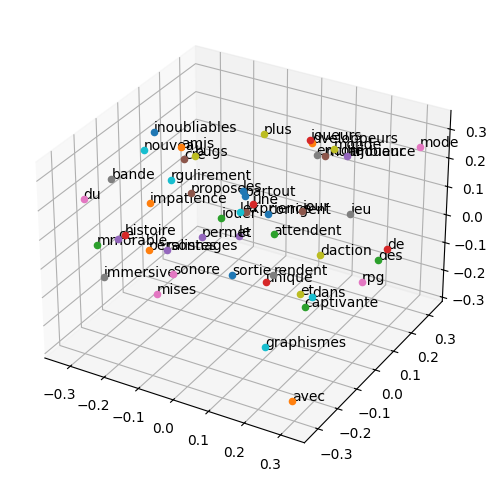

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Entraîner Word2Vec
model_w2v = Word2Vec(sentences=processed_docs, vector_size=3, window=3, min_count=1, workers=4)

# Récupérer vecteurs
words = list(model_w2v.wv.index_to_key)
vectors = [model_w2v.wv[word] for word in words]

# Plot 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for word, vec in zip(words, vectors):
    ax.scatter(vec[0], vec[1], vec[2])
    ax.text(vec[0], vec[1], vec[2], word)

plt.show()


**Étape 7 – Utiliser MiniLM (sentence-transformers) pour les phrases et afficher dans un plot 3d**

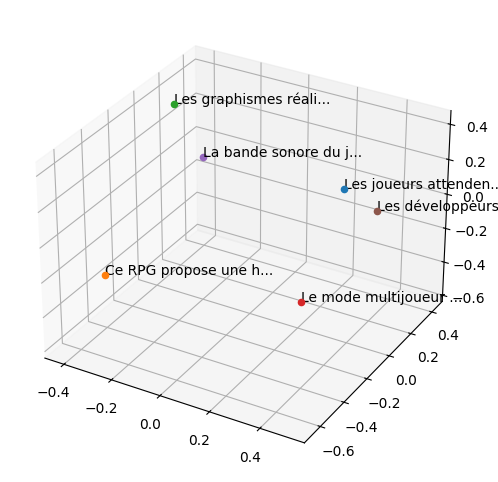

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Charger MiniLM
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embeddings des phrases
embeddings = model.encode(documents)

# Réduction en 3D
pca = PCA(n_components=3)
reduced = pca.fit_transform(embeddings)

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for doc, vec in zip(documents, reduced):
    ax.scatter(vec[0], vec[1], vec[2])
    ax.text(vec[0], vec[1], vec[2], doc[:20]+"...")

plt.show()
